### Non Linear Classification

- Linear classifiers like Linear SVM, Logistic Regression all of them uses linear boundary to saperate data.
- But In most of the real life dataset it is not possible to saperate them linearly. 
- Question is how to do that with nonlinear datasets ?
     - Key idea:-
         - Is to project your data to some higher dimension, so it becomes linearly saperable.
             - example :- A graph(2d) of dataset, which looks like concenteric circles, if we transform it into 3d space it will have Z-axis also, which will allow to create some hyperplane btw those concenteric dataset.
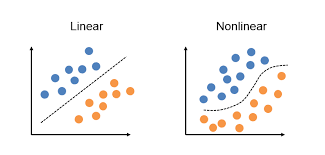

## Projecting data to higher dimensions!
When working with non-linear datasets, we can project original feature vectors into higher dimensional space where they can be linearlu separated!

#### Data in 2D Space
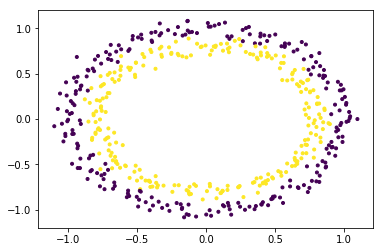

### Data Projected in 3-D dimensional Space, after processing the original data using a non-linear function
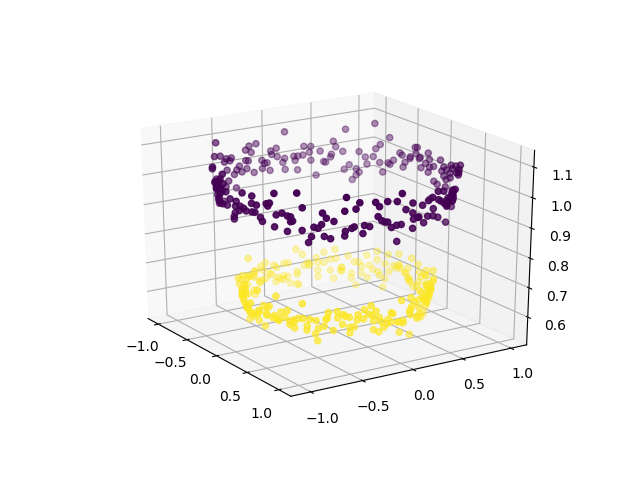

In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02)
print(X.shape, Y.shape)

(500, 2) (500,)


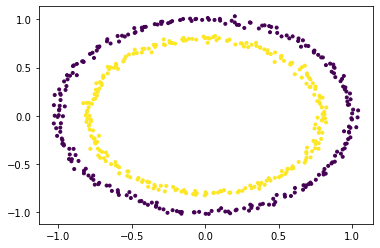

In [3]:
# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

The dataset is clearly a non-linear dataset and consists of two features (say, X and Y).

In order to use SVM for classifying this data, introduce another feature Z = X2 + Y2 into the dataset. Thus, projecting the 2-dimensional data into 3-dimensional space. The first dimension representing the feature X, second representing Y and third representing Z (which, mathematically, is equal to the radius of the circle of which the point (x, y) is a part of). Now, clearly, for the data shown above, the ‘yellow’ data points belong to a circle of smaller radius and the ‘purple’ data points belong to a circle of larger radius. Thus, the data becomes linearly separable along the Z-axis.

In [4]:
def phi(X):
    # Non Linear Transformation
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:, :-1] = X
    X_[:,-1] = X3
    
    return X_
     

In [5]:
X_ = phi(X)

(500, 3)


In [6]:
print(X[:3, :]) #X

[[-0.74467831  0.26915358]
 [-0.44709872 -0.88868134]
 [ 0.77388529 -0.17774013]]


In [7]:
print(X_[:3, :]) #X underscore

[[-0.74467831  0.26915358  0.62698943]
 [-0.44709872 -0.88868134  0.98965178]
 [ 0.77388529 -0.17774013  0.63049   ]]


In [8]:
def plot3d(X, show = True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection = '3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax.scatter(X1,X2,X3, zdir = 'z', s =20, c = Y, depthshade = True)
    if show == True:
        plt.show()
    return ax
    

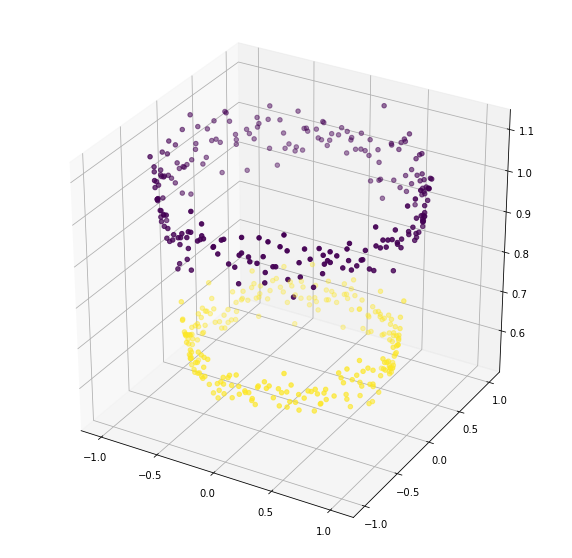

In [9]:
plot3d(X_)

## Results Using Logistic Classifiers

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
lr = LogisticRegression()

In [32]:
acc = cross_val_score(lr,X,Y,cv = 5).mean()
print('Accuracy X(2D) is %.4f'%(acc*100))

Accuracy X(2D) is 45.2000


In [33]:
# LOGGISITIC CLASSIFIER ON NEW DIMENTIONAL DATASET
acc = cross_val_score(lr,X_,Y,cv = 5).mean()
print('Accuracy X(2D) is %.4f'%(acc*100))

Accuracy X(2D) is 100.0000


In [34]:
# Visualize Decision Surface

In [35]:
lr.fit(X_,Y)

LogisticRegression()

In [36]:
wts = lr.coef_
wts

array([[ -0.03995165,  -0.02512323, -10.87049257]])

In [37]:
bias = lr.intercept_
bias

array([8.93515588])

In [38]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [39]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.83393697 0.83026173 0.82658649 0.82291126]
 [0.83162583 0.82795059 0.82427535 0.82060012]
 [0.82931469 0.82563945 0.82196421 0.81828898]
 [0.82700355 0.82332831 0.81965307 0.81597784]]


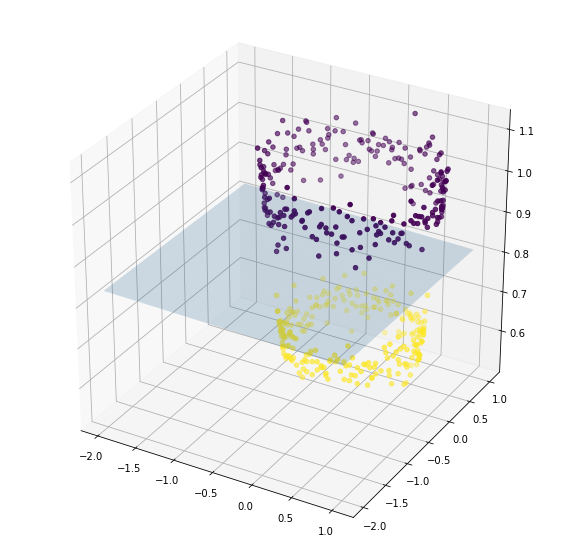

In [40]:
ax = plot3d(X_,show=False)
ax.plot_surface(xx,yy,z,alpha = 0.2)
plt.show()

### Kernel SVM
**In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.**
 
- Change $X_{i}\rightarrow\phi(X_{i})$
- $\phi(X_{i})$ denotes higher dimension
- $y_{i}(W^{T}X_{i}+b)$ to $y_{i}(W^{T}\phi(X_{i})+b)$
- This operation of conversion into higher dimension is computationaly costly
- Because we are need to apply it over every dataset
- CS229 By A. NG :::-- Lagrangian
- https://www.youtube.com/watch?v=1aQLEzeGJC8
- Kernel is a particular function with property
    - $K(x_{i}, x_{j}) = \phi(x_{i})^{T}\phi(x_{j})$
        - 
- https://towardsdatascience.com/kernel-function-6f1d2be6091 [SOURCE]
- Types of Kernel  
    - Linear Kernel
    - RBF(Radial Basis) Kernel
        - $K(x_{i},x{j}) = e^{-\gamma|x_{i}-x_{j}|^{2}}$
        - $\gamma$ is Amplitude of the function.
    - Polynomial Kernel 
        - $K(x_{i},x_{j}) = (\gamma x_{i}^{T}.x_{j} + r)^{c}$
        - C is the degree of polynomial
    - Sigmoid Kernel
        - $K(x_{i},x_{j}) = \frac{1 - e^{-2(yx_{i}.x{j} + r)}}{1 + e^{-2(yx_{i}.x_{j} + r)}} $

### Custom Kernel
- K(x1,x2) = (<x,y>)^2
- x1 = [1,2,3]
- x2 = [4,5,6]
- ( 4 + 10 + 18 )^2 -> computation as compared to x1^2 and x2^2

In [41]:
# Using SVM to use Kernel 
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm

In [46]:
svc = svm.SVC(kernel='linear') # SVC is with kernel

In [47]:
svc

SVC(kernel='linear')

In [48]:
svc.fit(X,Y)

SVC(kernel='linear')

In [51]:
# Scikit using linear kernel

In [62]:
svc.score(X,Y)

0.532

In [63]:
svc = svm.SVC(kernel='rbf') # better results with rbf kernel

In [64]:
svc.fit(X,Y)

SVC()

In [65]:
svc.score(X,Y)

1.0

In [66]:
svc = svm.SVC(kernel='poly') # Polynomial Kernel

In [67]:
svc.fit(X,Y)
svc.score(X,Y)

0.532

### Custom Kernel

In [77]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [79]:
svc = svm.SVC(kernel = custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0